**Praktikum 1**

Berikut adalah langkah-langkah beserta penjelasan singkat dan snapshot kode program Python untuk melakukan praktikum regresi linier, mengacu pada kode program yang telah diberikan sebelumnya:

**Langkah 1 - Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2 - Import Library**

In [123]:
# untuk manipulasi data
import numpy as np
import pandas as pd

# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# untuk pra pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# untuk pembuatan model
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR

**Langkah 3 - Baca Data**

In [124]:
# baca data dari file dataset.csv dan preprocessing data
df = pd.read_csv('Dataset/dataset.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Langkah 4 - Pemahaman Terhadap Data**

In [125]:
# ukuran data
df.shape

(500, 8)

In [126]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [127]:
# deskripsi data
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Langkah 5 - Visualisasi Data**

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

c:\Users\hubun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


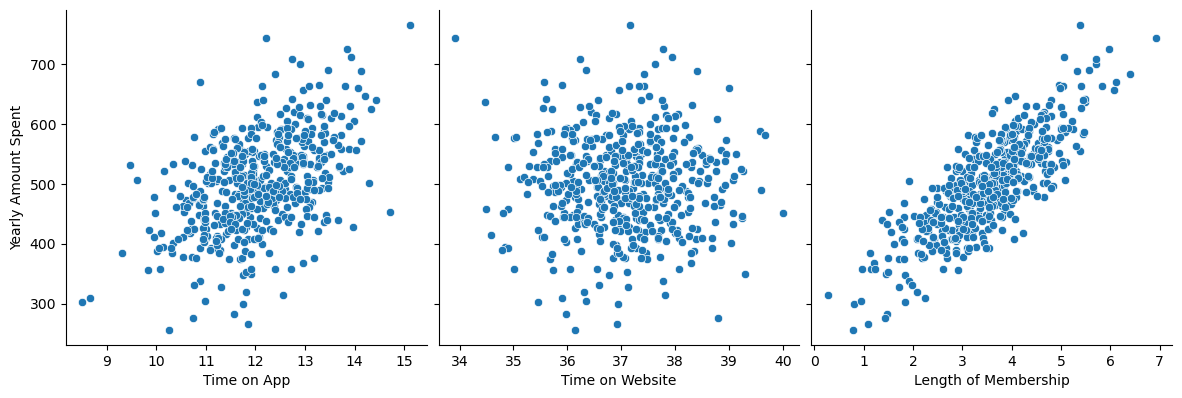

In [128]:
# operasi visualisasi
sns.pairplot(df, x_vars=['Time on App', 'Time on Website','Length of Membership'], y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

<Axes: >

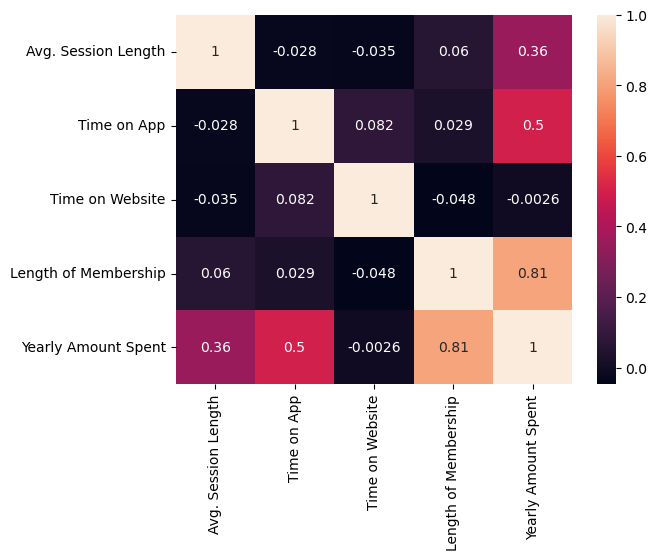

In [129]:
corr = df[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Yearly Amount Spent']].corr() 
sns.heatmap(corr, annot=True)

Dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

**Langkah 6 - Regresi Linier**

In [130]:
x = df['Length of Membership']
y = df['Yearly Amount Spent']

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.
Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [132]:
# Buat pemisahan data uji dan data latih dengan proporsi 7: 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [133]:
# training the model
X_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, X_train_sm).fit()

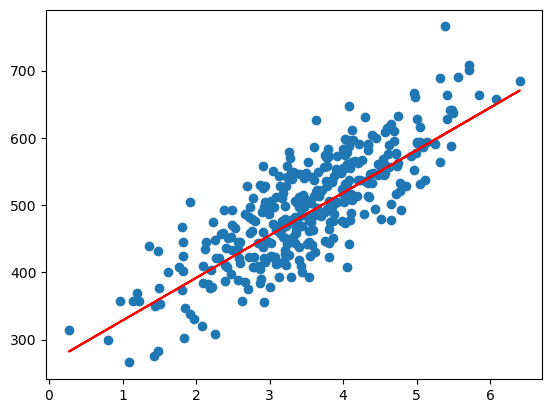

In [134]:
# visualisasi garis regresi
plt.scatter(x_train, y_train)
plt.plot(x_train, 265.2483 + 63.3015*x_train, 'r')
plt.show()

**Langkah 7 - Residual Analysis**

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

In [138]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

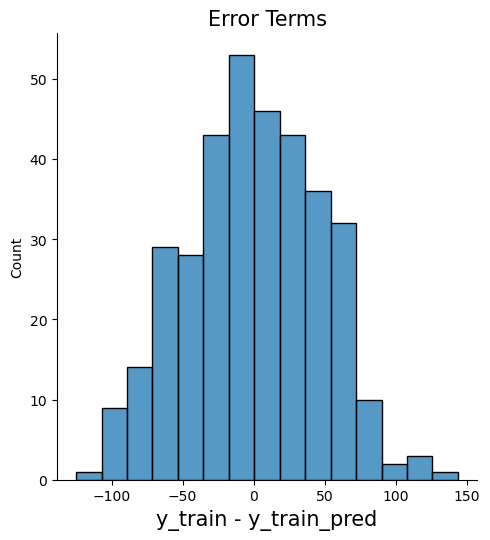

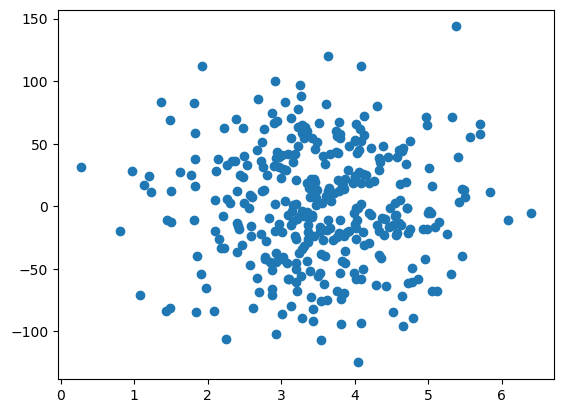

In [139]:
# visualize the residual plot
ffig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

plt.scatter(x_train, res)
plt.show()

**Langkah 8 - Prediksi pada Data Uji dan Evaluasi Model**

In [140]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

In [141]:
# predict test data
r_squared = r2_score(y_test, y_test_pred)

**Langkah 9: Visualisasi Hasil**

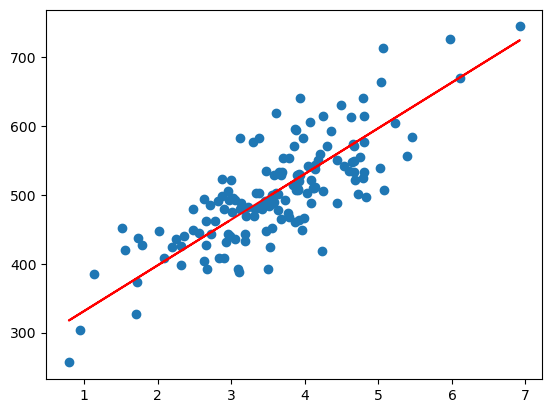

In [142]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

**Praktikum 2**

SVR

**Langkah 1 - Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2 - Impor Data**

In [143]:
# baca data dari file dataset.csv dan preprocessing data
df = pd.read_csv('Dataset/posisi_gaji.csv')
df.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Memilih fitur (variabel independen X) dan target (variabel dependen y).

In [144]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [145]:
df

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**Langkah 3 - Feature Scalling**

In [146]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**Langkah 4 - Fitting SVR ke Dataset**

In [148]:
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

c:\Users\hubun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Langkah 5 - Visualisasi Hasil SVR**

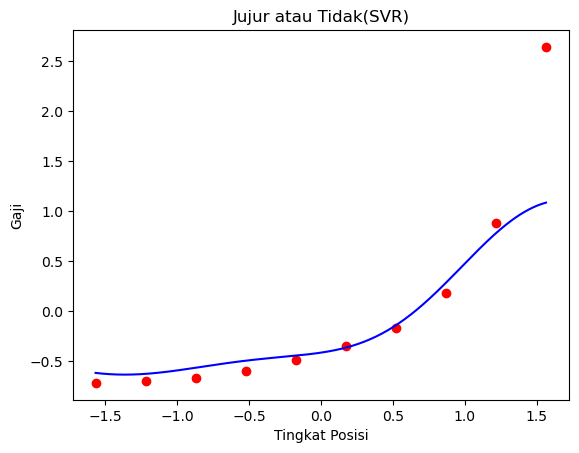

In [149]:
x_grid = np.arange(min(x), max(x), 0.01).reshape(-1, 1)
plt.scatter(x, y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title('Jujur atau Tidak(SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
plt.show()

**Langkah 6 - Prediksi Hasil**

In [150]:
tingkat_posisi_prediksi = np.array([[6.5]])
tingkat_posisi_prediksi = sc_x.transform(tingkat_posisi_prediksi)
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

**Langkah 7 - Menampilkan Hasi**

In [151]:
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**Langkah 8 - Evaluasi Model SVR**

In [155]:
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(x)

mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269
